In [1]:
import numpy as np 
import pandas as pd
import sys
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from gensim.models import Word2Vec

Import data and clean null cells.

In [2]:
TrueNews = pd.read_csv("../input/dataminingproject2/True.csv")
FakeNews = pd.read_csv("../input/dataminingproject2/Fake.csv")

TrueNews.fillna("", inplace=True)
FakeNews.fillna("", inplace=True)

TrueNews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Create new isFake column.

In [3]:
TrueNews["isFake"] = 0
FakeNews["isFake"] = 1

FakeNews.head()

,title,text,subject,date,isFake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


Remove punctuation.

In [4]:
TrueNews['title'] = TrueNews['title'].str.lower().str.replace('[{}]'.format(string.punctuation), '')
TrueNews['text'] = TrueNews['text'].str.lower().str.replace('[{}]'.format(string.punctuation), '')
TrueNews['subject'] = TrueNews['subject'].str.lower().str.replace('[{}]'.format(string.punctuation), '')

FakeNews['title'] = FakeNews['title'].str.lower().str.replace('[{}]'.format(string.punctuation), '')
FakeNews['text'] = FakeNews['text'].str.lower().str.replace('[{}]'.format(string.punctuation), '')
FakeNews['subject'] = FakeNews['subject'].str.lower().str.replace('[{}]'.format(string.punctuation), '')

TrueNews.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: Fu

,title,text,subject,date,isFake
0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,politicsnews,"December 31, 2017",0
1,us military to accept transgender recruits on ...,washington reuters transgender people will be...,politicsnews,"December 29, 2017",0
2,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,politicsnews,"December 31, 2017",0
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,politicsnews,"December 30, 2017",0
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,politicsnews,"December 29, 2017",0


Create a dataframe with all the data.

In [5]:
allData = pd.concat([TrueNews, FakeNews])

allData.head()

,title,text,subject,date,isFake
0,as us budget fight looms republicans flip thei...,washington reuters the head of a conservative...,politicsnews,"December 31, 2017",0
1,us military to accept transgender recruits on ...,washington reuters transgender people will be...,politicsnews,"December 29, 2017",0
2,senior us republican senator let mr mueller do...,washington reuters the special counsel invest...,politicsnews,"December 31, 2017",0
3,fbi russia probe helped by australian diplomat...,washington reuters trump campaign adviser geo...,politicsnews,"December 30, 2017",0
4,trump wants postal service to charge much more...,seattlewashington reuters president donald tr...,politicsnews,"December 29, 2017",0


In [6]:
allData.tail()

,title,text,subject,date,isFake
23476,mcpain john mccain furious that iran treated u...,21st century wire says as 21wire reported earl...,middleeast,"January 16, 2016",1
23477,justice yahoo settles email privacy classactio...,21st century wire says it s a familiar theme w...,middleeast,"January 16, 2016",1
23478,sunnistan us and allied ‘safe zone’ plan to ta...,patrick henningsen 21st century wireremember ...,middleeast,"January 15, 2016",1
23479,how to blow 700 million al jazeera america fin...,21st century wire says al jazeera america will...,middleeast,"January 14, 2016",1
23480,10 us navy sailors held by iranian military – ...,21st century wire says as 21wire predicted in ...,middleeast,"January 12, 2016",1


Wordcloud for true news.

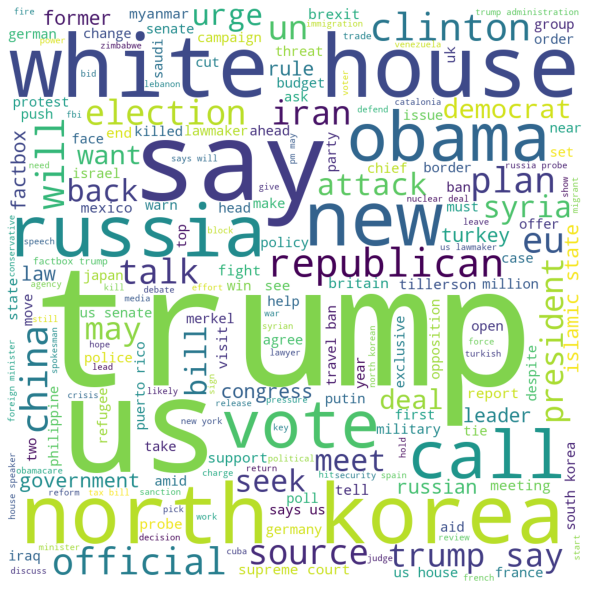

In [7]:
stopwords = set(STOPWORDS)

trueWords = ""
for i in TrueNews['title']:
    trueWords += i + " "

wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 12).generate(trueWords)
  
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Wordcloud for fake news.

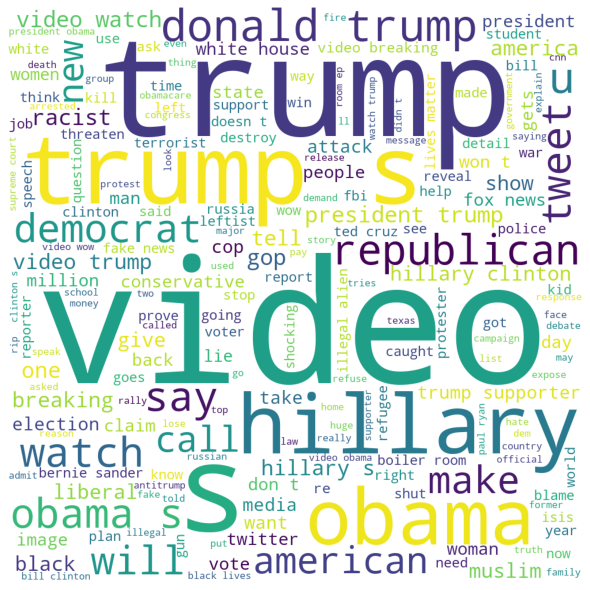

In [8]:
fakeWords = ""
for i in FakeNews['title']:
    fakeWords += i + " "

wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 12).generate(fakeWords)
  
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

2.β

63.07988980716254   92.22665133512201
2332.6729700705046   2488.3253268600147


<BarContainer object of 2 artists>

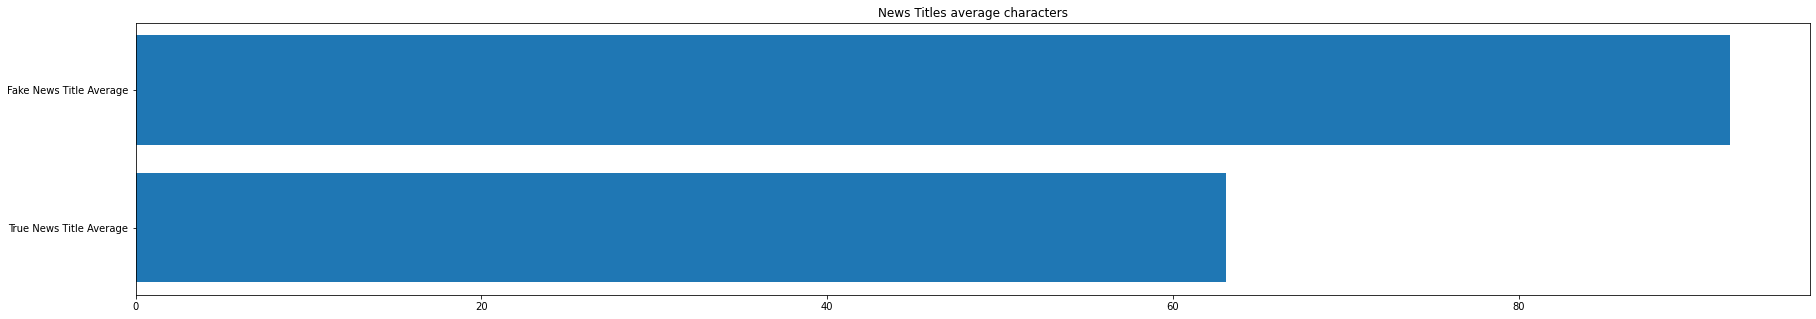

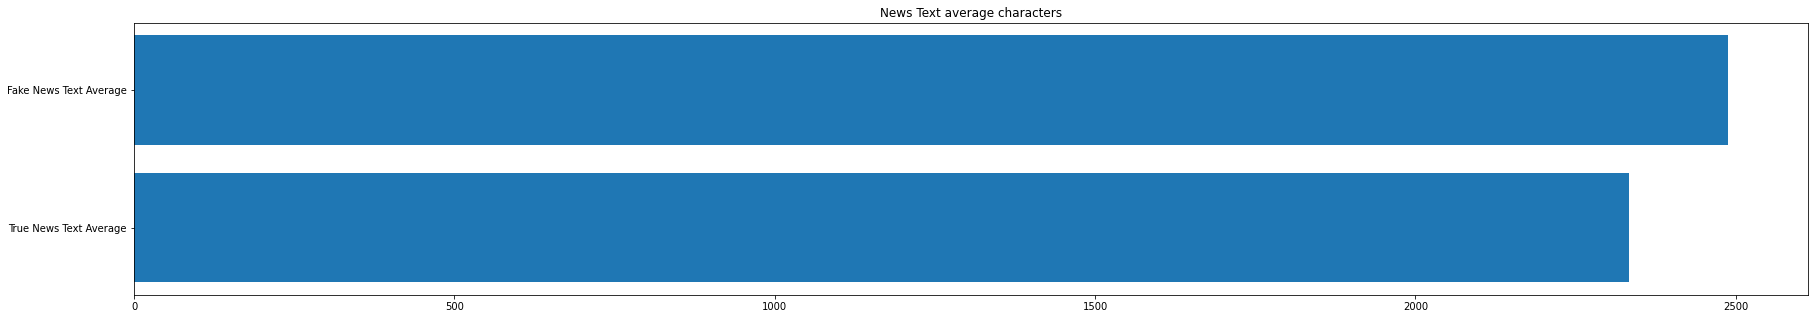

In [9]:
trueTitleCharacters = 0
for i in TrueNews['title']:
    trueTitleCharacters += len(i)
averageTrueTitleCharacters = trueTitleCharacters / TrueNews.shape[0]
    
fakeTitleCharacters = 0
for i in FakeNews['title']:
    fakeTitleCharacters += len(i)
averageFakeTitleCharacters = fakeTitleCharacters / FakeNews.shape[0]

trueTextCharacters = 0
for i in TrueNews['text']:
    trueTextCharacters += len(i)
averageTrueTextCharacters = trueTextCharacters / TrueNews.shape[0]
    
fakeTextCharacters = 0
for i in FakeNews['text']:
    fakeTextCharacters += len(i)
averageFakeTextCharacters = fakeTextCharacters / FakeNews.shape[0]

print(averageTrueTitleCharacters, " ", averageFakeTitleCharacters)
print(averageTrueTextCharacters, " ", averageFakeTextCharacters)

plot_values = [averageTrueTitleCharacters,averageFakeTitleCharacters]
plot_labels = ["True News Title Average","Fake News Title Average"]

plt.figure(figsize=(30, 5))
plt.title(f"News Titles average characters")
plt.barh(plot_labels, plot_values)

plot_values = [averageTrueTextCharacters,averageFakeTextCharacters]
plot_labels = ["True News Text Average","Fake News Text Average"]

plt.figure(figsize=(30, 5))
plt.title(f"News Text average characters")
plt.barh(plot_labels, plot_values)

# plot_large = []
# plot_labels = []
# for i in range(min([20, len(netflix_rankings.keys())])):
#     max_element = max(netflix_rankings, key=netflix_rankings.get)
#     plot_large.append(netflix_rankings[max_element])
#     plot_labels.append(max_element)
#     del netflix_rankings[max_element]

# plt.figure(figsize=(30, 5))
# plt.title(f"top movies in netflix")
# plt.barh(plot_labels, plot_large)


2.γ

<BarContainer object of 2 artists>

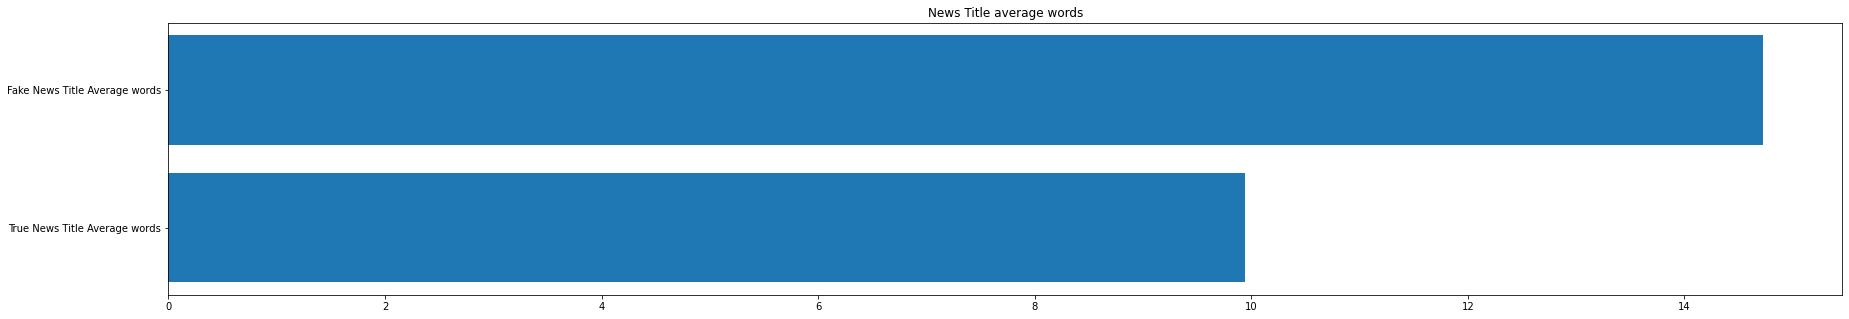

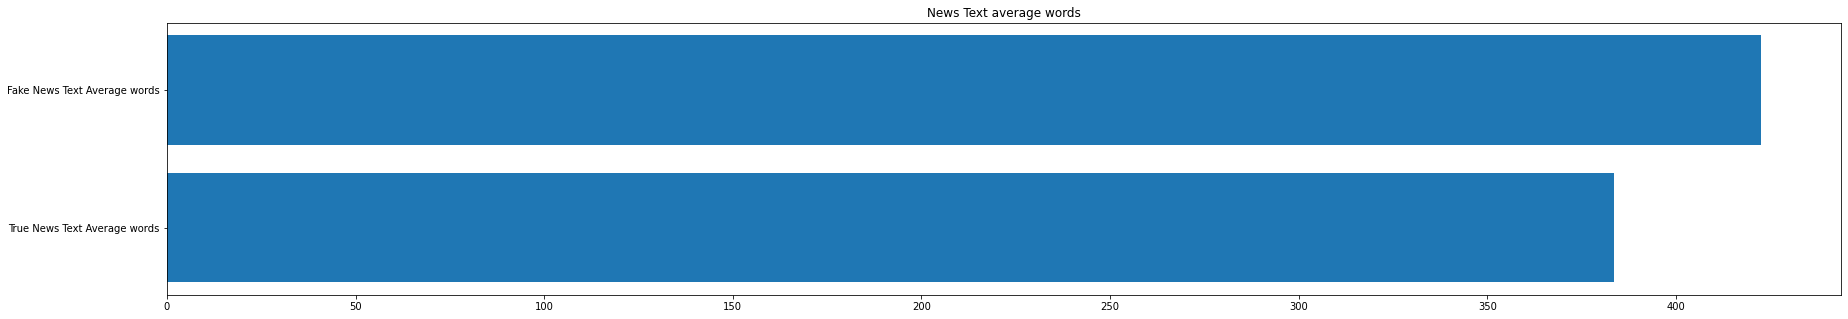

In [10]:

TrueTitleWords = 0
for i in TrueNews['title']:
    TrueTitleWords += len(i.split())


FakeTitleWords = 0
for i in FakeNews['title']:
    FakeTitleWords += len(i.split())
    
plot_values = [TrueTitleWords/TrueNews.shape[0],FakeTitleWords/FakeNews.shape[0]]
plot_labels = ["True News Title Average words","Fake News Title Average words"]

plt.figure(figsize=(30, 5))
plt.title(f"News Title average words")
plt.barh(plot_labels, plot_values)


TrueTextWords = 0
for i in TrueNews['text']:
    TrueTextWords += len(i.split())


FakeTextWords = 0
for i in FakeNews['text']:
    FakeTextWords += len(i.split())
    
plot_values = [TrueTextWords/TrueNews.shape[0],FakeTextWords/FakeNews.shape[0]]
plot_labels = ["True News Text Average words","Fake News Text Average words"]

plt.figure(figsize=(30, 5))
plt.title(f"News Text average words")
plt.barh(plot_labels, plot_values)
    
    

2.δ

<BarContainer object of 2 artists>

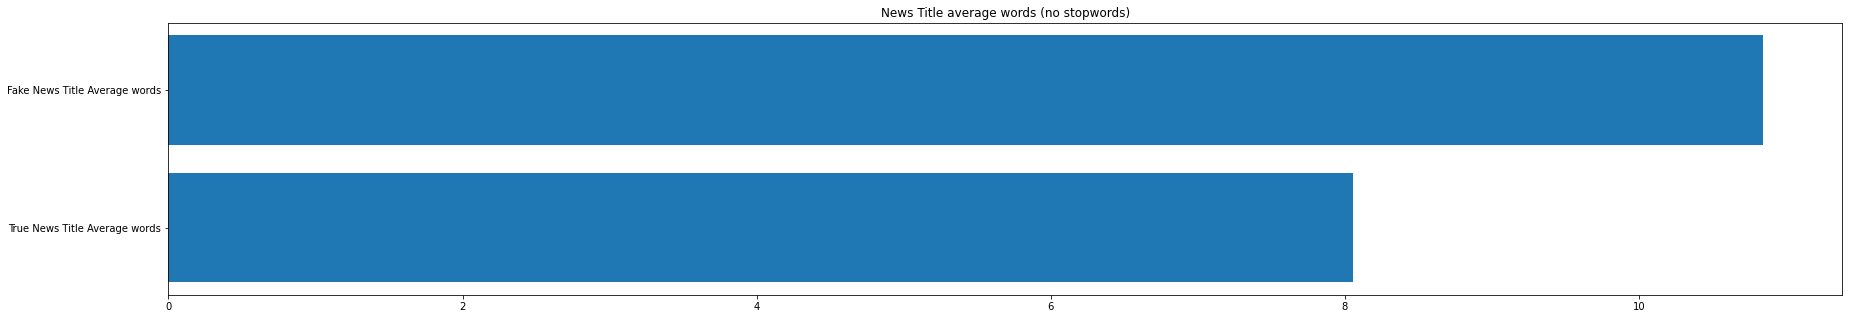

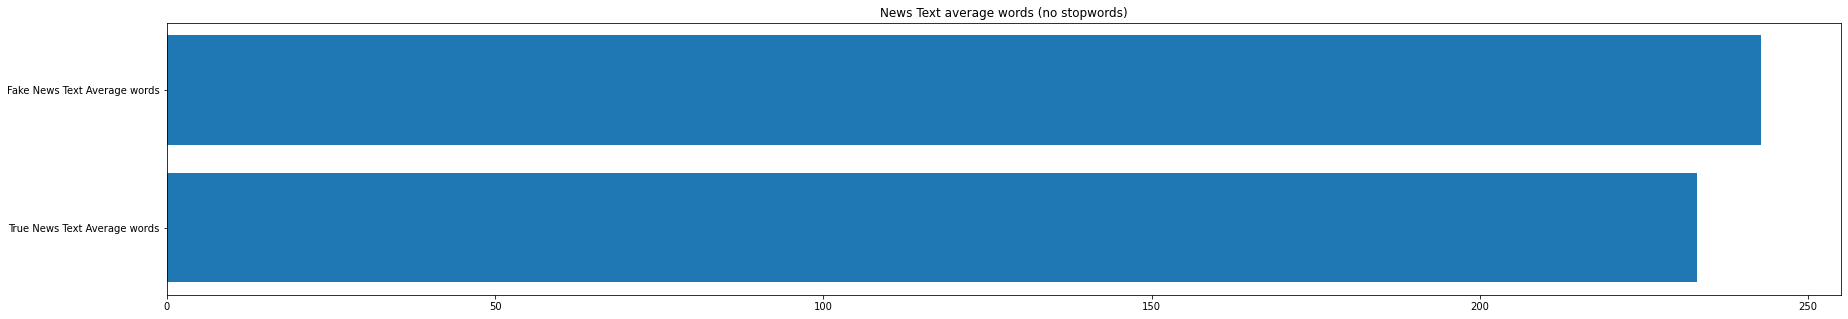

In [11]:
TrueTitleWords = 0

for i in TrueNews['title']:
    for j in i.split():
        if( j not in stopwords):
            TrueTitleWords += 1


FakeTitleWords = 0
for i in FakeNews['title']:
    for j in i.split():
        if( j not in stopwords):
            FakeTitleWords += 1

    
plot_values = [TrueTitleWords/TrueNews.shape[0],FakeTitleWords/FakeNews.shape[0]]
plot_labels = ["True News Title Average words","Fake News Title Average words"]

plt.figure(figsize=(30, 5))
plt.title(f"News Title average words (no stopwords)")
plt.barh(plot_labels, plot_values)


TrueTextWords = 0
for i in TrueNews['text']:
    for j in i.split():
        if( j not in stopwords):
            TrueTextWords += 1



FakeTextWords = 0
for i in FakeNews['text']:
    for j in i.split():
        if( j not in stopwords):
            FakeTextWords += 1

    
plot_values = [TrueTextWords/TrueNews.shape[0],FakeTextWords/FakeNews.shape[0]]
plot_labels = ["True News Text Average words","Fake News Text Average words"]

plt.figure(figsize=(30, 5))
plt.title(f"News Text average words (no stopwords)")
plt.barh(plot_labels, plot_values)

Most common bigrams.

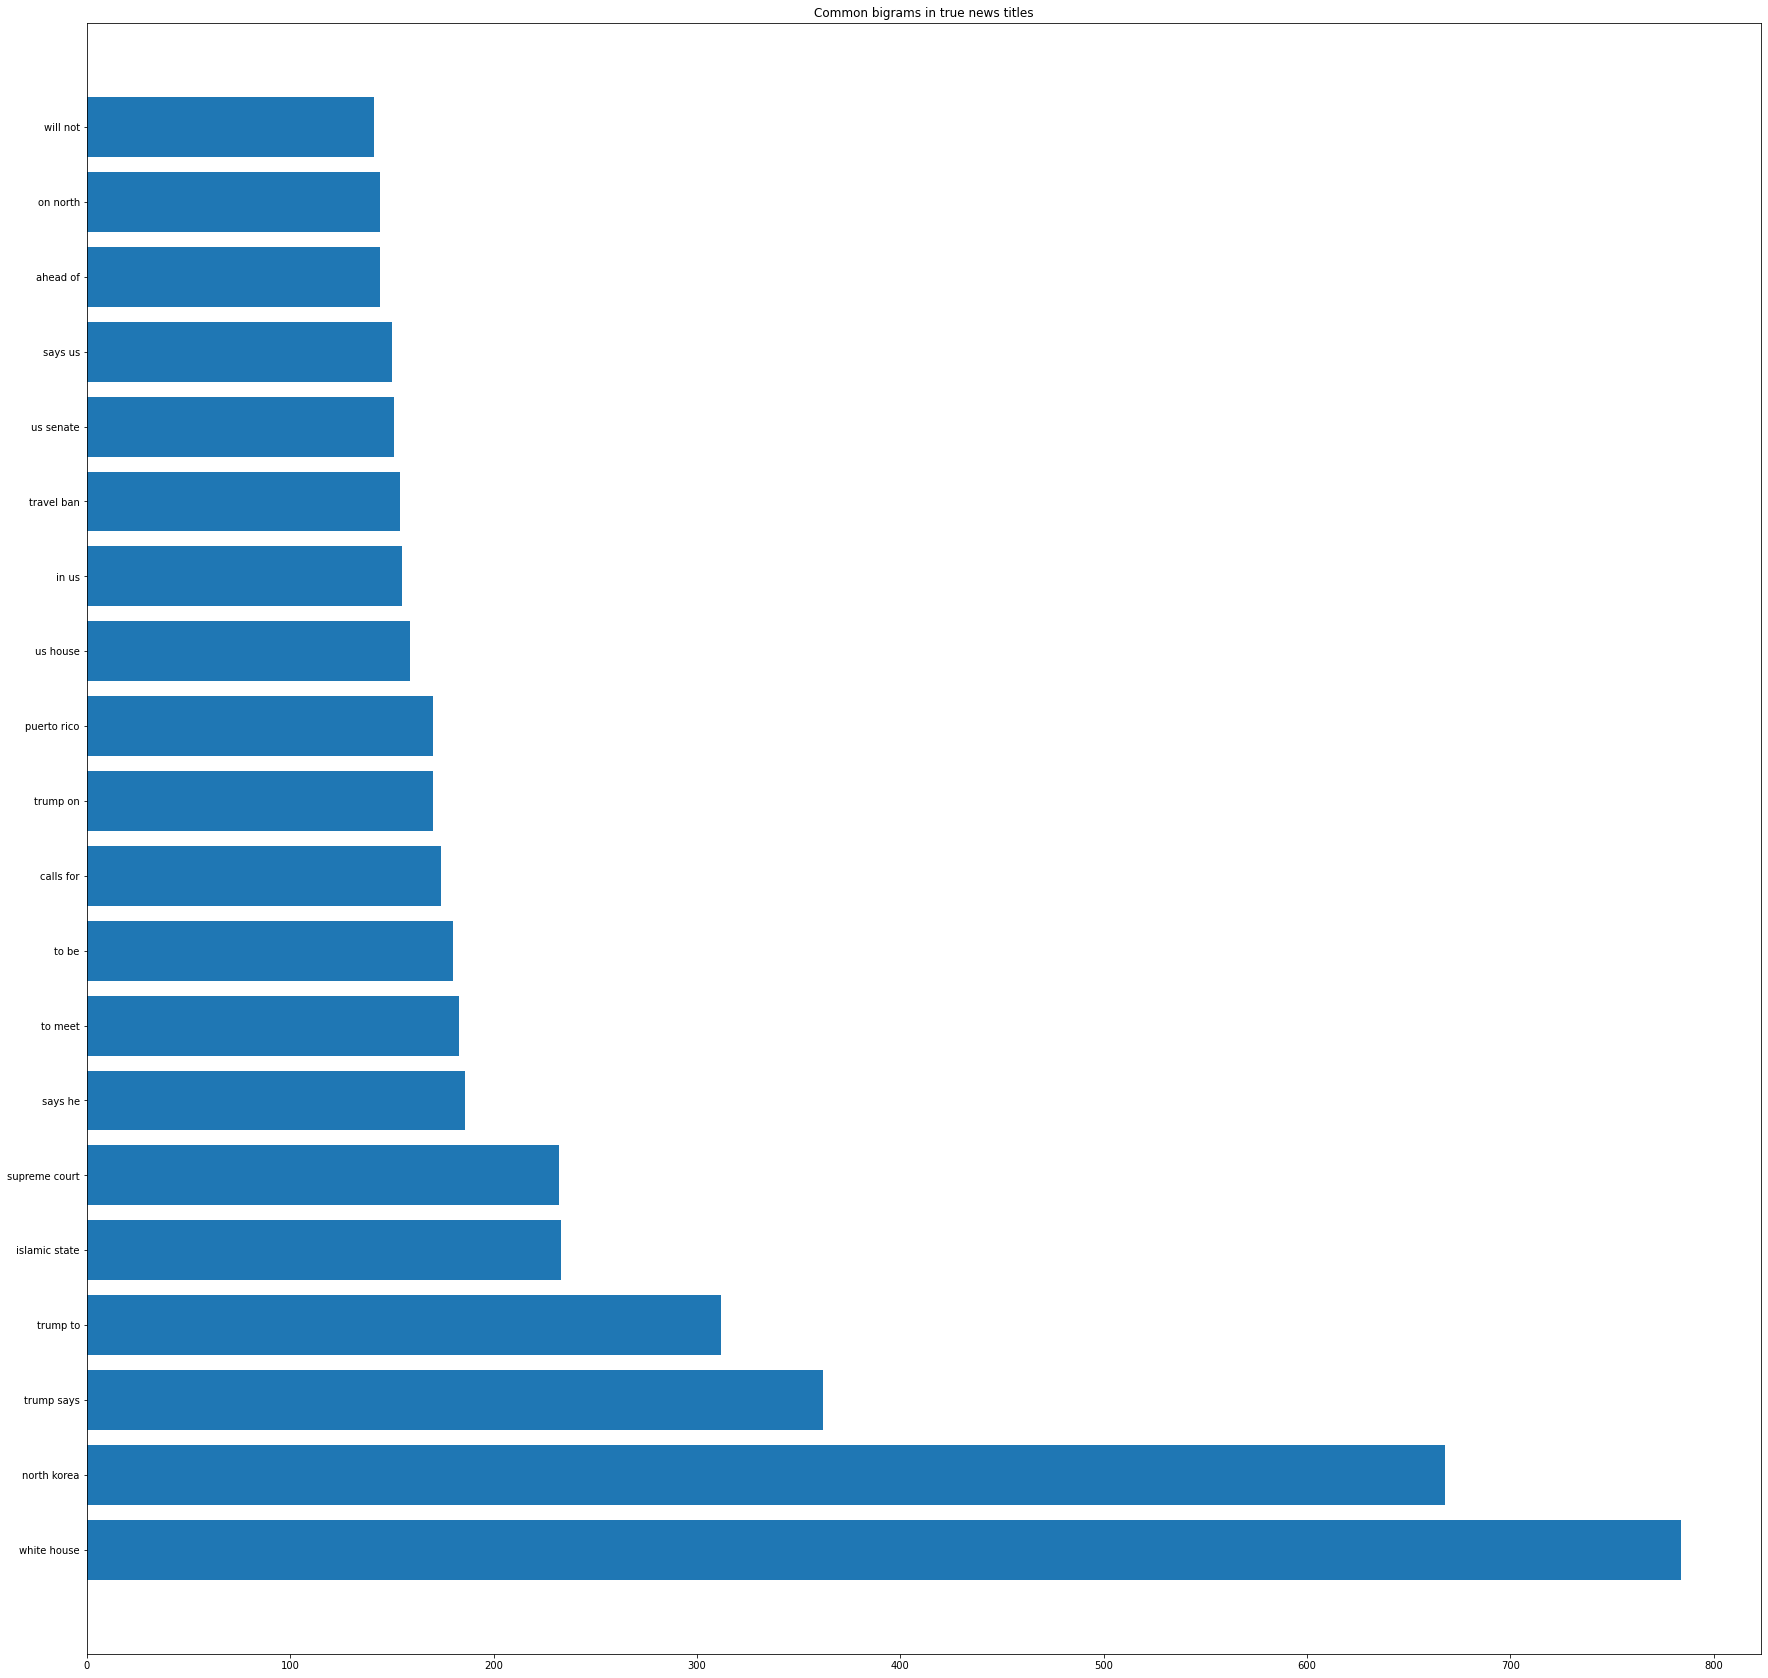

In [12]:
bigramsDict = {}
for i in TrueNews['title']:
    separateWords = i.split()
    for j in range(len(separateWords) - 1):
        bi = separateWords[j] + " " + separateWords[j+1]
        if bi not in bigramsDict:
            bigramsDict[bi] = 1
        else:
            bigramsDict[bi] += 1


bigramsDict = sorted(bigramsDict.items(), reverse=True, key=lambda x: x[1])[:20]

top20BigramsTitleTrueValues = [i[1] for i in bigramsDict]
top20BigramsTitleTrueLabels = [i[0] for i in bigramsDict]
    
plt.figure(figsize=(30, 30))
plt.title(f"Common bigrams in true news titles")
plt.barh(top20BigramsTitleTrueLabels, top20BigramsTitleTrueValues)
del bigramsDict

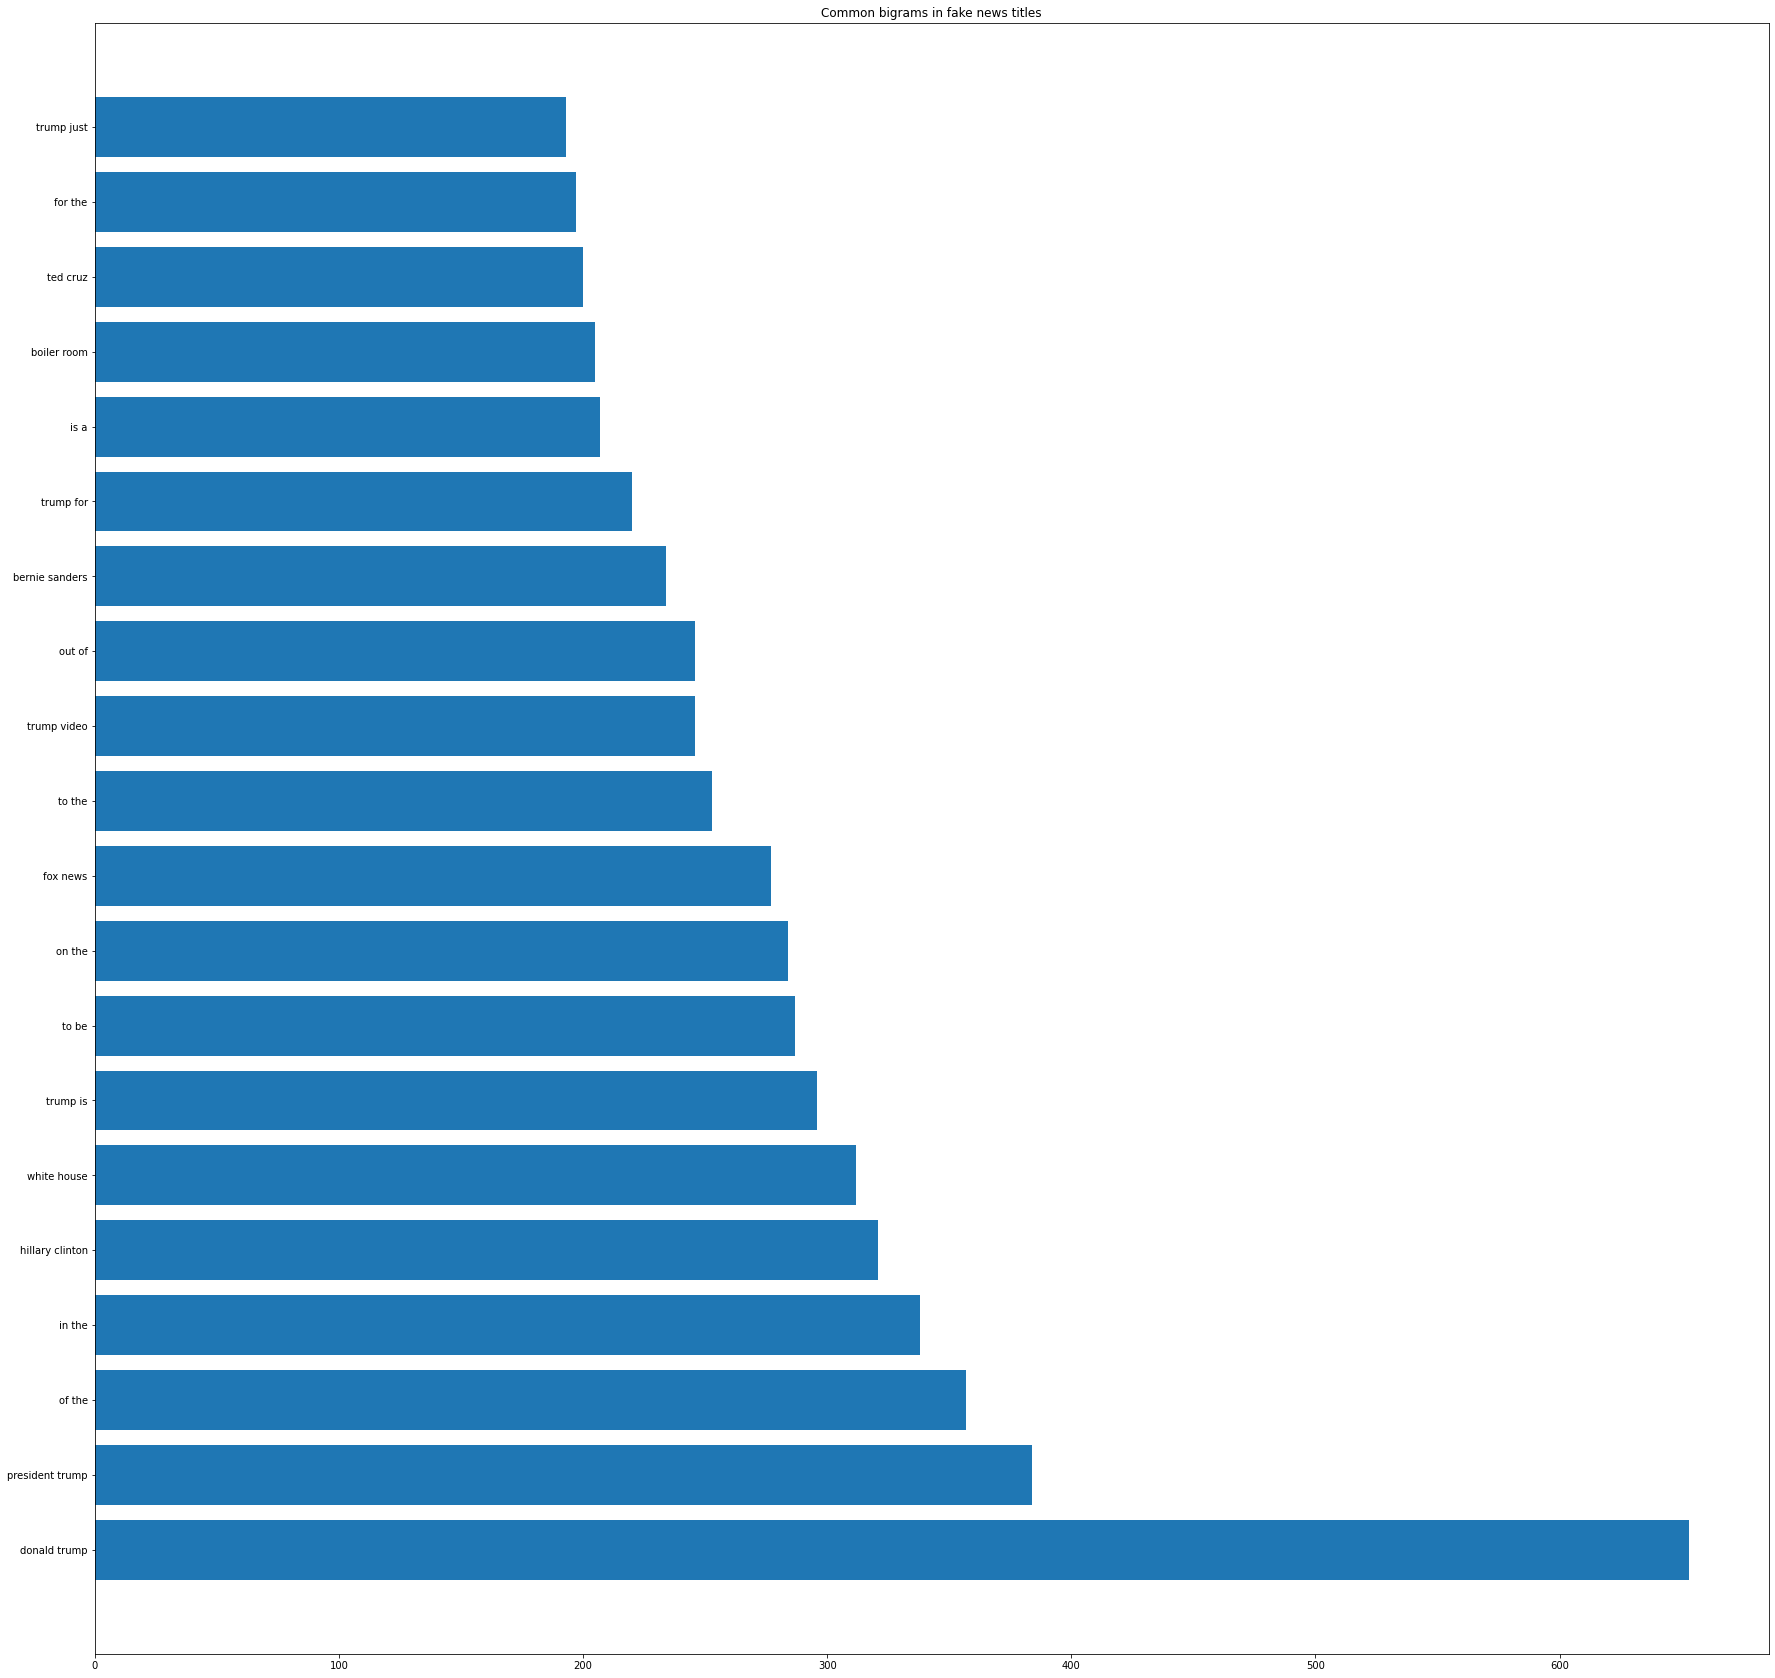

In [13]:
bigramsDict = {}
for i in FakeNews['title']:
    separateWords = i.split()
    for j in range(len(separateWords) - 1):
        bi = separateWords[j] + " " + separateWords[j+1]
        if bi not in bigramsDict:
            bigramsDict[bi] = 1
        else:
            bigramsDict[bi] += 1


bigramsDict = sorted(bigramsDict.items(), reverse=True, key=lambda x: x[1])[:20]

top20BigramsTitleFakeValues = [i[1] for i in bigramsDict]
top20BigramsTitleFakeLabels = [i[0] for i in bigramsDict]
    
plt.figure(figsize=(30, 30))
plt.title(f"Common bigrams in fake news titles")
plt.barh(top20BigramsTitleFakeLabels, top20BigramsTitleFakeValues)
del bigramsDict

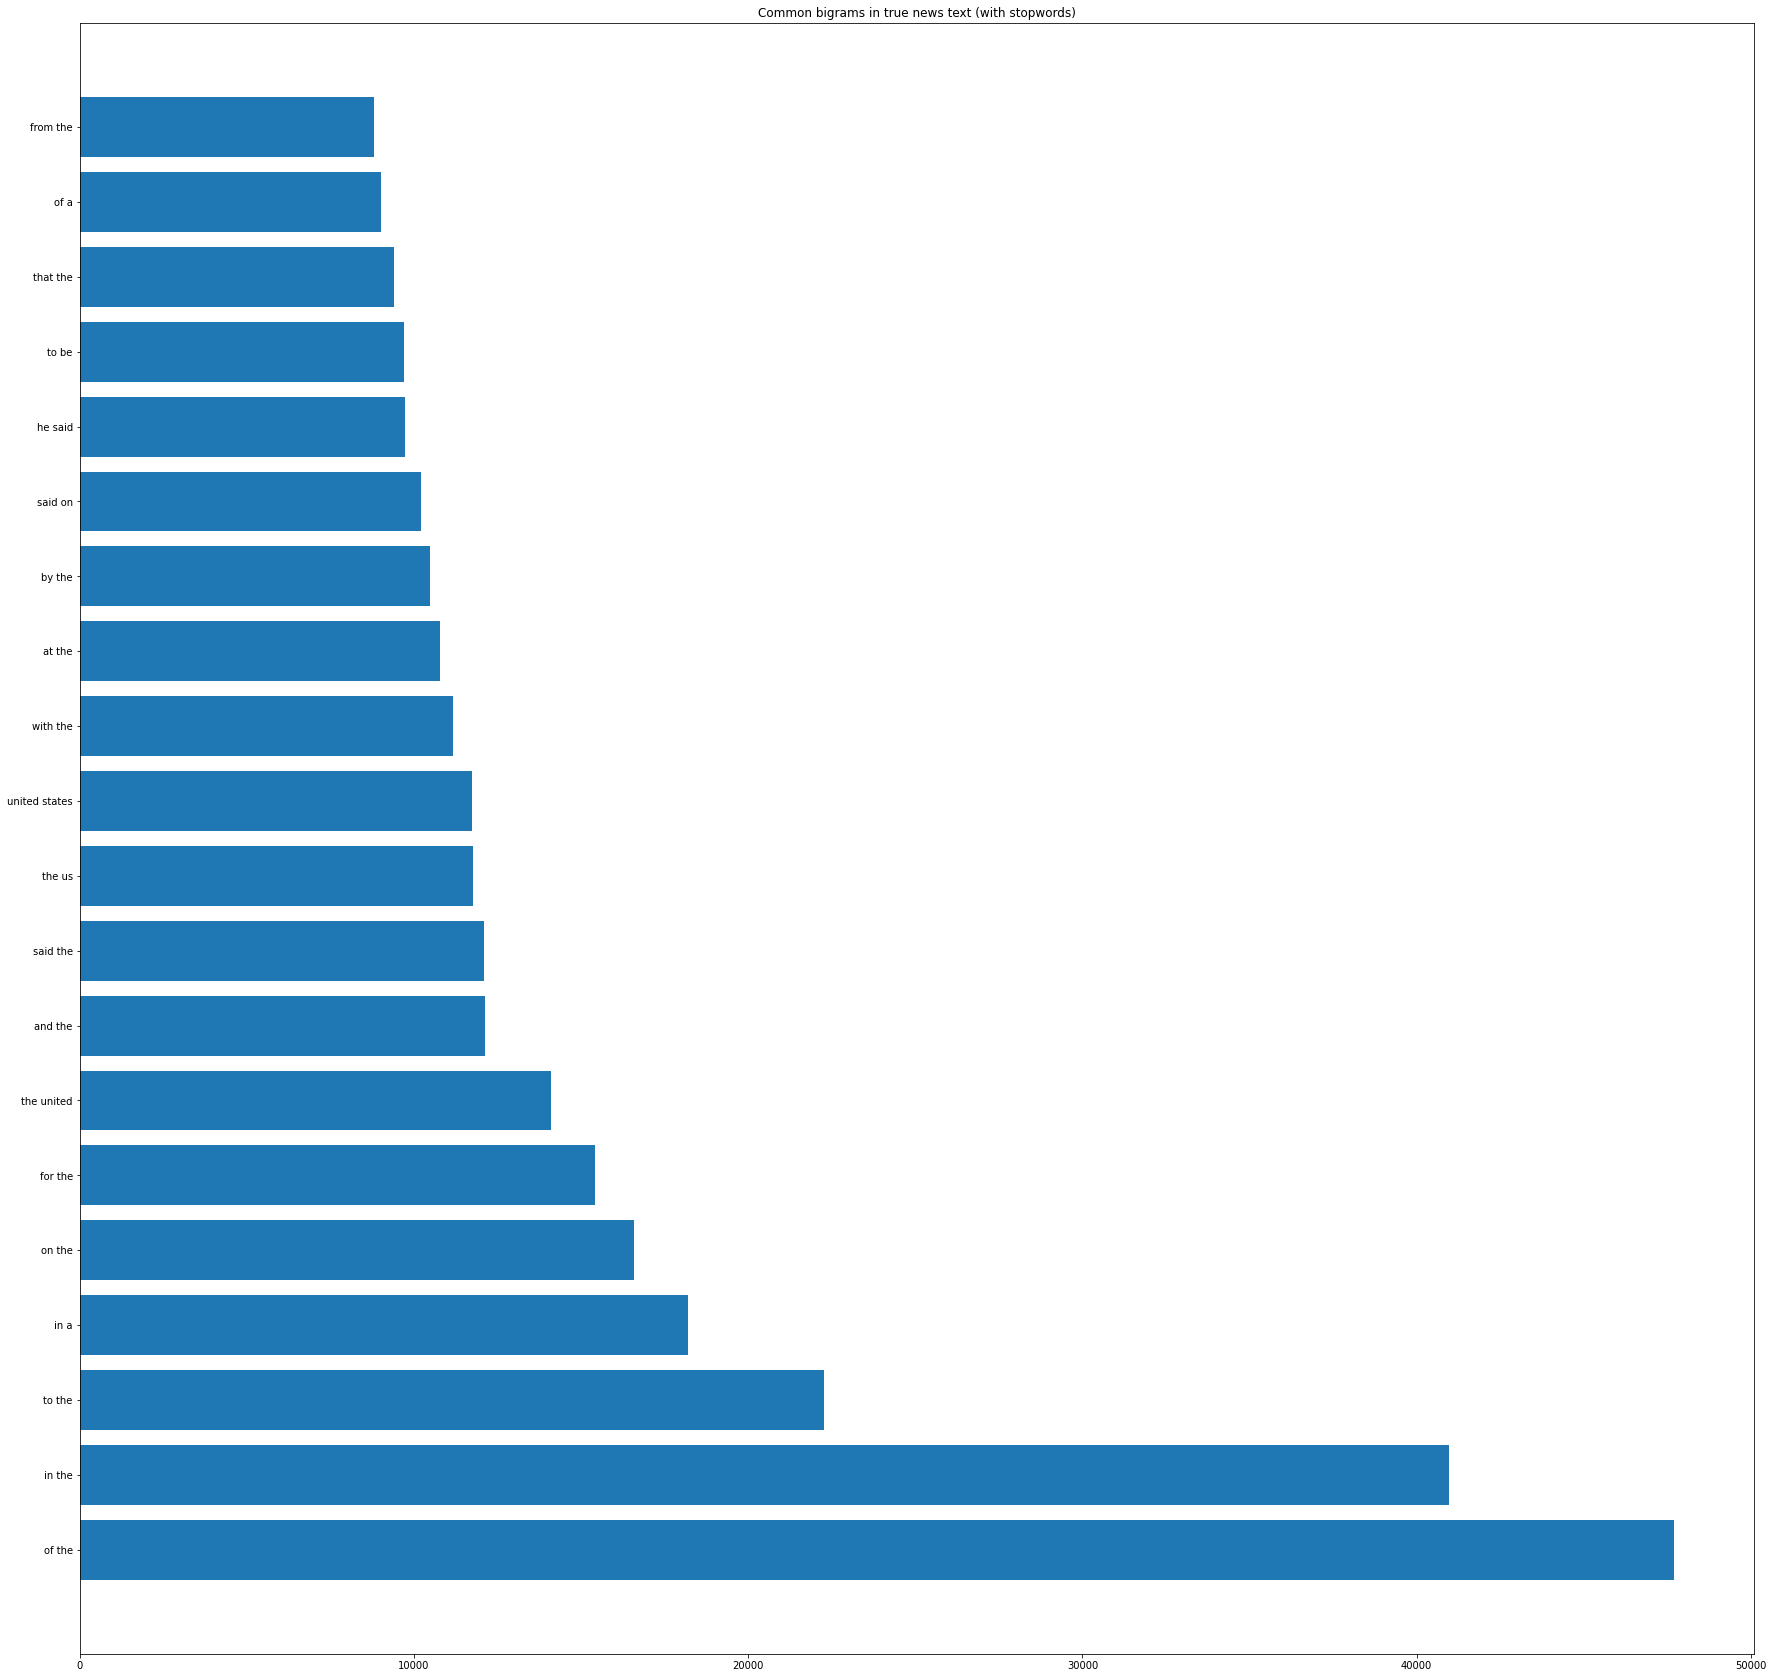

In [14]:
bigramsDict = {}
for i in TrueNews['text']:
    separateWords = i.split()
    for j in range(len(separateWords) - 1):
        bi = separateWords[j] + " " + separateWords[j+1]
        if bi not in bigramsDict:
            bigramsDict[bi] = 1
        else:
            bigramsDict[bi] += 1


bigramsDict = sorted(bigramsDict.items(), reverse=True, key=lambda x: x[1])[:20]

top20BigramsTextTrueValues = [i[1] for i in bigramsDict]
top20BigramsTextTrueLabels = [i[0] for i in bigramsDict]
    
plt.figure(figsize=(30, 30))
plt.title(f"Common bigrams in true news text (with stopwords)")
plt.barh(top20BigramsTextTrueLabels, top20BigramsTextTrueValues)
del bigramsDict

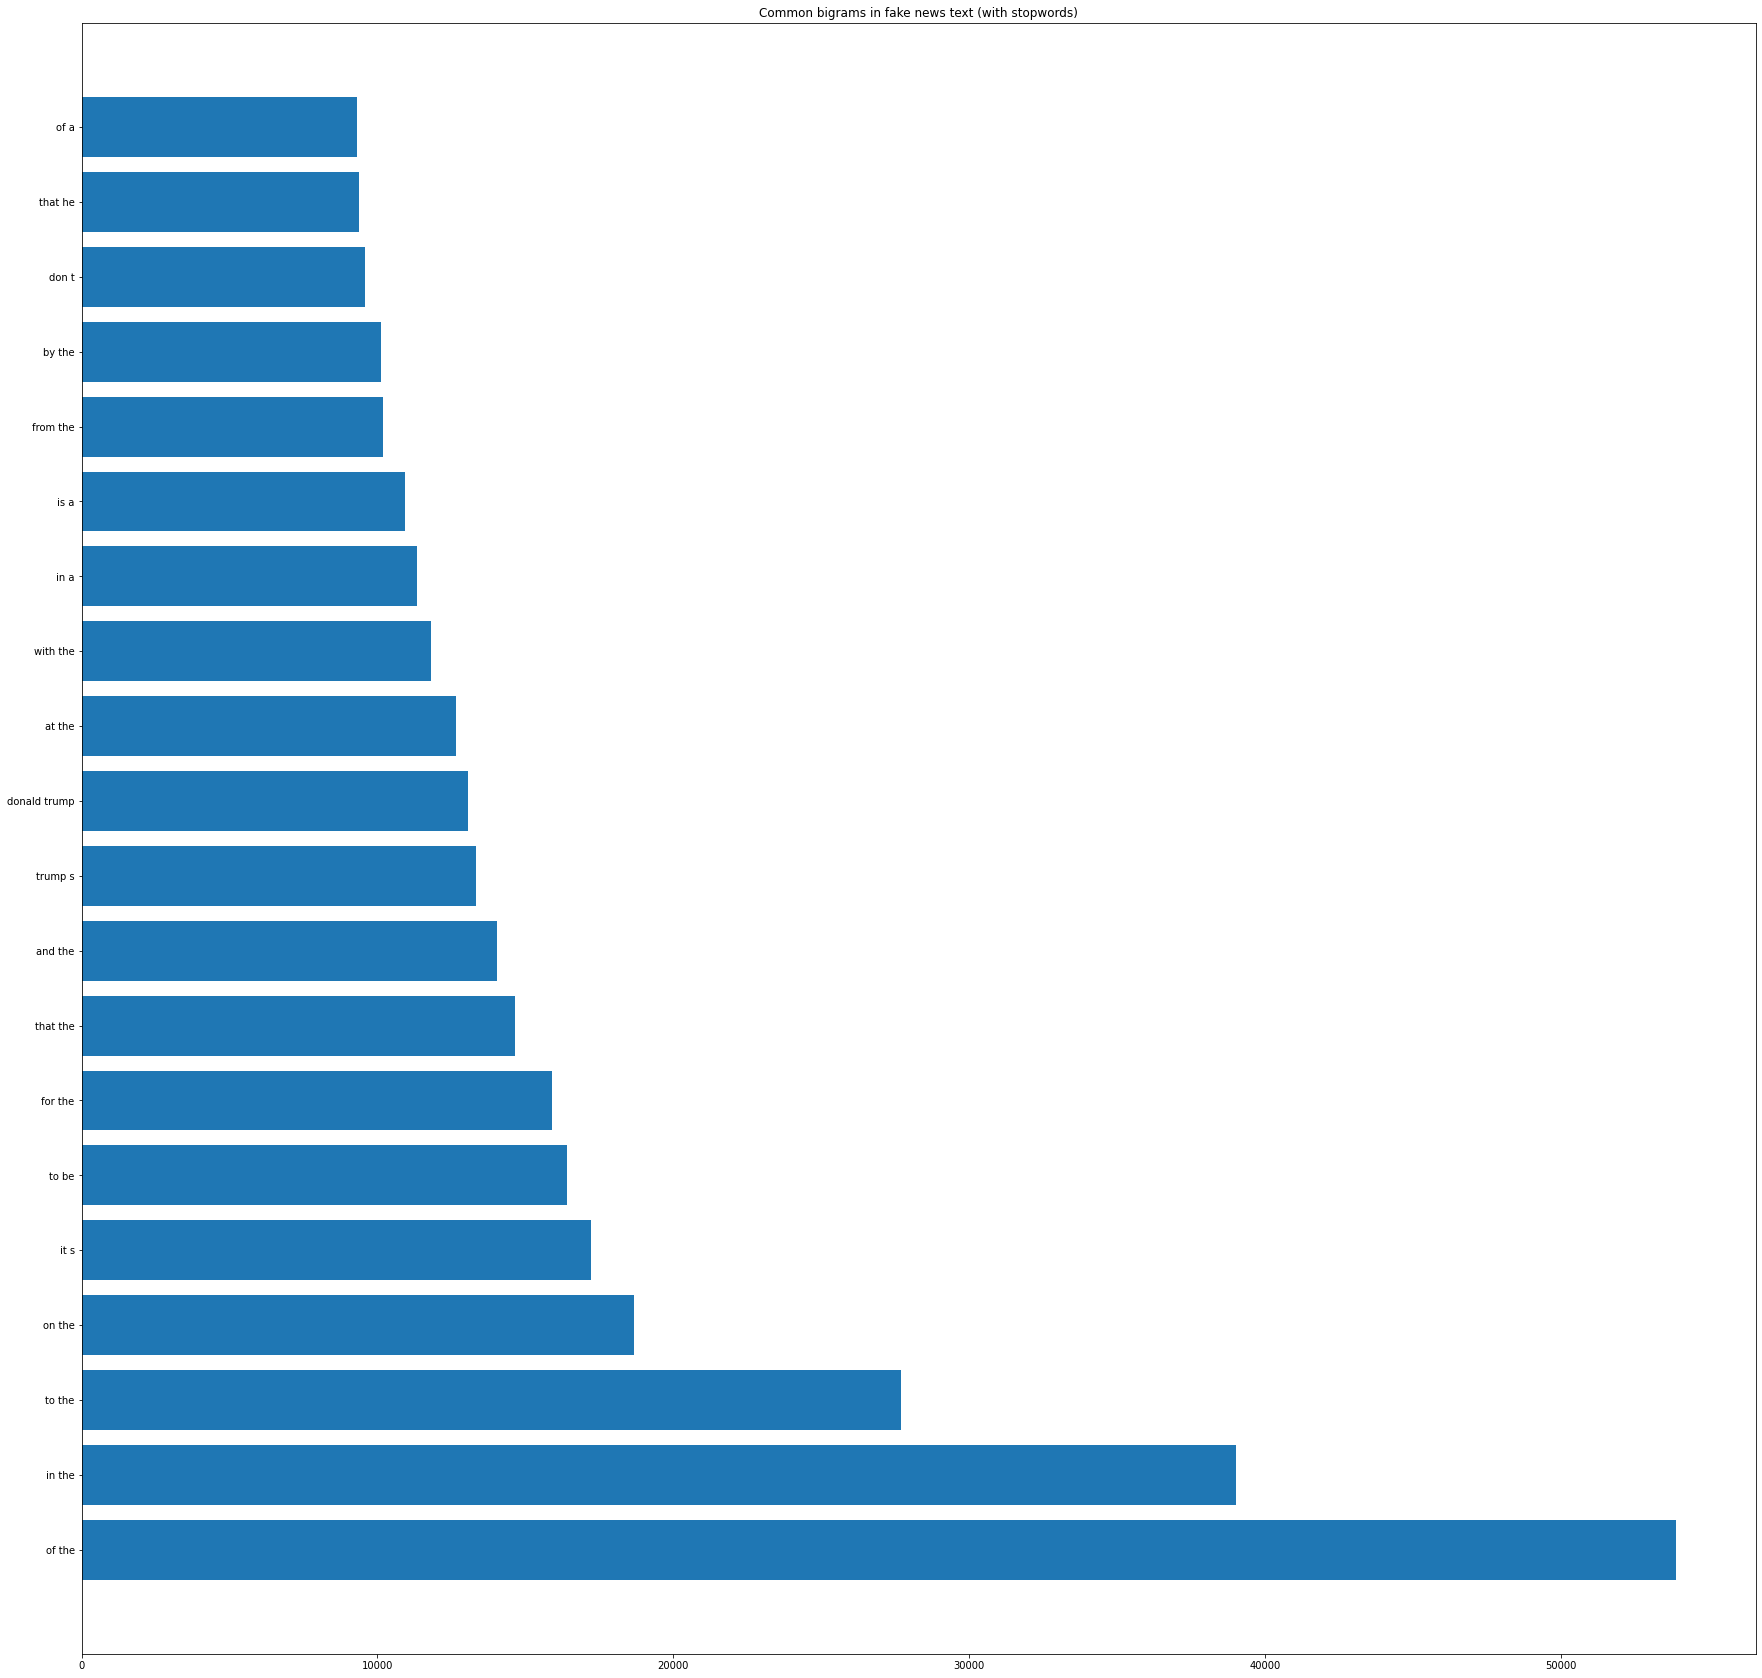

In [15]:
bigramsDict = {}
for i in FakeNews['text']:
    separateWords = i.split()
    for j in range(len(separateWords) - 1):
        bi = separateWords[j] + " " + separateWords[j+1]
        if bi not in bigramsDict:
            bigramsDict[bi] = 1
        else:
            bigramsDict[bi] += 1


bigramsDict = sorted(bigramsDict.items(), reverse=True, key=lambda x: x[1])[:20]

top20BigramsTextFakeValues = [i[1] for i in bigramsDict]
top20BigramsTextFakeLabels = [i[0] for i in bigramsDict]
    
plt.figure(figsize=(30, 30))
plt.title(f"Common bigrams in fake news text (with stopwords)")
plt.barh(top20BigramsTextFakeLabels, top20BigramsTextFakeValues)
del bigramsDict

Split test-train data.

In [16]:
X = pd.DataFrame(allData, columns = ['title','text','subject','date'])
y = pd.DataFrame(allData, columns = ['isFake'])

Xnumpy = X.to_numpy()
ynumpy = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(Xnumpy, ynumpy, test_size=0.25, random_state=42,stratify = ynumpy)

# print(X_train)
# print(y_train)
# print(X_test)
# print(y_test)

traincsv = pd.DataFrame(X_train, columns = ['title','text','subject','date'])
traincsv['label'] = y_train

testcsv = pd.DataFrame(X_test, columns = ['title','text','subject','date'])
testcsv['label'] = y_test

y_train = y_train.ravel()
y_test = y_test.ravel()

traincsv.to_csv('train.csv', index=False )
testcsv.to_csv('test.csv', index=False )

In [17]:
X_trainSum = X_train[:, 0] + " " + X_train[:, 1]
vectorizer = CountVectorizer(stop_words=stopwords, max_df=0.98, min_df=0.01)
fit = vectorizer.fit_transform(X_trainSum)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Train Logistic Regression.

In [18]:
LR = LogisticRegression(n_jobs=-1, random_state=42)
LR = LR.fit(fit, y_train)

Predict with Logistic Regression.

In [19]:
X_testSum = X_test[:, 0] + " " + X_test[:, 1]
fitTest = vectorizer.transform(X_testSum)
predictions = LR.predict(fitTest)

Confusion matrix.

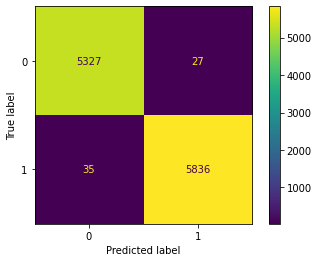

In [20]:
cm = confusion_matrix(y_test, predictions, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot() 

In [21]:
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
print("F1 score: ", f1)
print("Accuracy: ", accuracy)

F1 score:  0.9944767935680193
Accuracy:  0.9944766146993318


Gaussian Naive Bayes.

In [22]:
gnb = GaussianNB()
gnb = gnb.fit(fit.toarray(), y_train)

Predict gNB.

In [23]:
predictions = gnb.predict(fitTest.toarray())

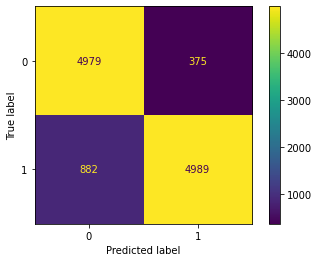

In [24]:
cm = confusion_matrix(y_test, predictions, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot() 

In [25]:
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
print("F1 score: ", f1)
print("Accuracy: ", accuracy)

F1 score:  0.8880223233028923
Accuracy:  0.8880178173719376


Support Vector Machines.

In [26]:
svc = SVC(kernel='linear', gamma='auto')
svc = svc.fit(fit, y_train)

Predict SVM.

In [27]:
predictions = svc.predict(fitTest)

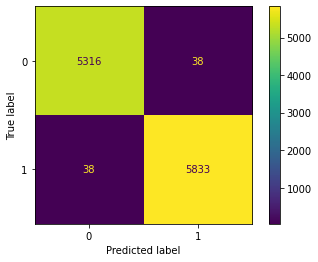

In [28]:
cm = confusion_matrix(y_test, predictions, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot() 

In [29]:
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
print("F1 score: ", f1)
print("Accuracy: ", accuracy)

F1 score:  0.9932293986636971
Accuracy:  0.9932293986636971


Random Forests.

In [30]:
RF = RandomForestClassifier(random_state=42)
RF = RF.fit(fit, y_train)

Predict Random Forests.

In [31]:
predictions = RF.predict(fitTest)

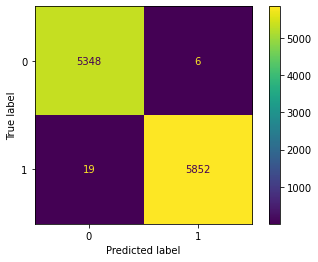

In [32]:
cm = confusion_matrix(y_test, predictions, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot() 

In [33]:
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
print("F1 score: ", f1)
print("Accuracy: ", accuracy)

F1 score:  0.9977729445540865
Accuracy:  0.9977728285077951


Do all of the same with tf-idf.

In [34]:
vectorizer = TfidfVectorizer(stop_words=stopwords, max_df=0.98, min_df=0.01)
fit = vectorizer.fit_transform(X_trainSum)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Logistic Regression.

In [35]:
LR = LogisticRegression(n_jobs=-1, random_state=42)
LR = LR.fit(fit, y_train)
fitTest = vectorizer.transform(X_testSum)
predictions = LR.predict(fitTest)

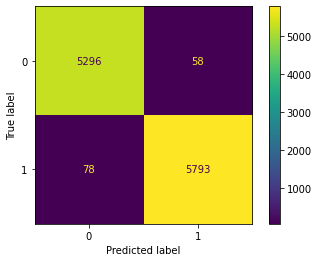

In [36]:
cm = confusion_matrix(y_test, predictions, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot() 

In [37]:
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
print("F1 score: ", f1)
print("Accuracy: ", accuracy)

F1 score:  0.9878851447580907
Accuracy:  0.9878841870824053


Gaussian Naive Bayes.

In [38]:
gnb = GaussianNB()
gnb = gnb.fit(fit.toarray(), y_train)
predictions = gnb.predict(fitTest.toarray())

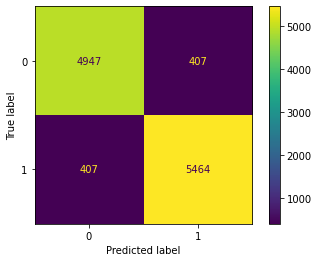

In [39]:
cm = confusion_matrix(y_test, predictions, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot() 

In [40]:
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
print("F1 score: ", f1)
print("Accuracy: ", accuracy)

F1 score:  0.9274832962138084
Accuracy:  0.9274832962138084


Support Vector Machines.

In [41]:
svc = SVC(kernel='linear', gamma='auto')
svc = svc.fit(fit, y_train)
predictions = svc.predict(fitTest)

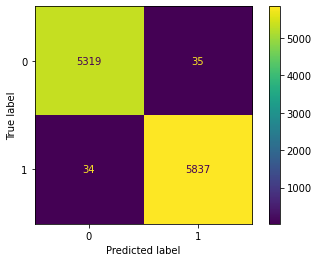

In [42]:
cm = confusion_matrix(y_test, predictions, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot() 

In [43]:
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
print("F1 score: ", f1)
print("Accuracy: ", accuracy)

F1 score:  0.993852981356737
Accuracy:  0.9938530066815144


Random Forest.

In [44]:
RF = RandomForestClassifier(random_state=42)
RF = RF.fit(fit, y_train)
predictions = RF.predict(fitTest)

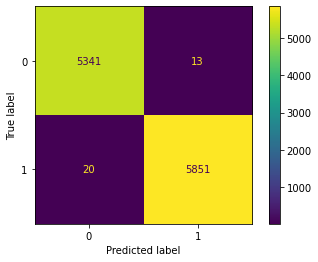

In [45]:
cm = confusion_matrix(y_test, predictions, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot() 

In [46]:
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
print("F1 score: ", f1)
print("Accuracy: ", accuracy)

F1 score:  0.9970602170983913
Accuracy:  0.9970601336302896


Title + text in lists of words for word2vec.

In [47]:
allSentences = np.concatenate([X_trainSum, X_testSum], axis=None)
allSentencesWords = [i.split() for i in allSentences]
print(allSentencesWords[0])

['tunisia', 'to', 'hold', 'longdelayed', 'municipal', 'vote', 'in', '2018', 'tunis', 'reuters', 'tunisia', 'will', 'hold', 'longdelayed', 'municipal', 'elections', 'in', '2018', 'the', 'presidency', 'said', 'on', 'tuesday', 'the', 'first', 'such', 'vote', 'since', 'the', '2011', 'uprising', 'unseated', 'autocrat', 'zine', 'elabidine', 'ben', 'ali', 'activists', 'hope', 'the', 'elections', 'will', 'give', 'a', 'new', 'push', 'for', 'the', 'north', 'african', 'country', 's', 'democratic', 'transition', 'by', 'giving', 'more', 'power', 'to', 'local', 'councils', 'soldiers', 'and', 'security', 'forces', 'will', 'get', 'to', 'vote', 'on', 'april', '29', 'and', 'members', 'of', 'the', 'public', 'on', 'may', '6', 'president', 'beji', 'caid', 'essebsi', 'said', 'in', 'a', 'statement', 'the', 'vote', 'had', 'been', 'postponed', 'several', 'times', 'raising', 'fears', 'among', 'activists', 'that', 'figures', 'from', 'the', 'old', 'regime', 'were', 'trying', 'to', 'stall', 'the', 'advances', 'pro

Train word2vec (tried to use pretrained data but couldn't due to slow internet, even on online environments for some reason).

In [48]:
model = Word2Vec(sentences=allSentencesWords, vector_size=200, window=5, min_count=2, workers=4)

Find vector means for each sentence.

In [49]:
trainWords = [i.split() for i in X_trainSum]
trainVectors = []
for i in trainWords:
    vectors = []
    for j in i:
        try:
            vectors.append(model.wv[j])
        except:
            pass
    trainVectors.append(vectors)

In [50]:
trainVectorsMeans = [np.mean(i, axis=0) for i in trainVectors]

In [51]:
print(trainVectorsMeans[0])

[ 0.21691042  0.634646    0.2194032  -0.4328019  -0.42021623 -0.3094196
  0.24983998 -0.8100065   0.46977508 -0.18239467  0.32081917  0.34453174
  0.42758504  0.18027988 -0.20182905  0.3375933   0.3843558  -0.29992402
 -0.26648074  0.01303263  0.02353348 -0.09726945 -0.0063798  -0.24524187
  0.06149448 -0.13340905  0.35118032 -0.1438656   0.39258522 -0.14077511
 -0.29233462 -0.22432257 -0.1377178   0.2853605  -0.08706713 -0.46335992
  0.21221669  0.4233179   0.28485137 -0.26179722 -0.06066755 -0.2628262
 -0.13346834 -0.16085255 -0.18188998  0.2429305  -0.24124734  0.03622701
 -0.91553855  0.01779597  0.21990958  0.03350334 -0.05895865 -0.39767164
  0.08962411  0.16037771 -0.39776903 -0.36443612 -0.05128956  0.0193588
 -0.0847653  -0.76238084 -0.25293493  0.0532381   0.6816855   0.2840499
  0.37249723  0.11051418  0.32133567 -0.15805165 -0.22693463  0.27548876
 -0.23062362  0.09370431  0.213957   -0.04420412  0.03721354  0.08586474
 -0.08066973 -0.14874156 -0.2817295   0.35322258 -0.012

In [52]:
testWords = [i.split() for i in X_testSum]
testVectors = []
for i in testWords:
    vectors = []
    for j in i:
        try:
            vectors.append(model.wv[j])
        except:
            pass
    testVectors.append(vectors)

In [53]:
testVectorsMeans = [np.mean(i, axis=0) for i in testVectors]

In [54]:
LR = LogisticRegression(n_jobs=-1, random_state=42)
LR = LR.fit(trainVectorsMeans, y_train)
predictions = LR.predict(testVectorsMeans)

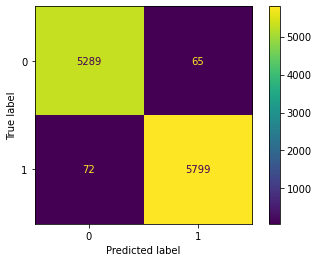

In [55]:
cm = confusion_matrix(y_test, predictions, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot() 

In [56]:
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
print("F1 score: ", f1)
print("Accuracy: ", accuracy)

F1 score:  0.9877954467418064
Accuracy:  0.9877951002227171


In [57]:
gnb = GaussianNB()
gnb = gnb.fit(trainVectorsMeans, y_train)
predictions = gnb.predict(testVectorsMeans)

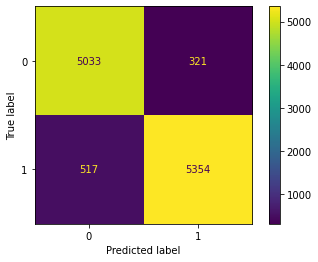

In [58]:
cm = confusion_matrix(y_test, predictions, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot() 

In [59]:
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
print("F1 score: ", f1)
print("Accuracy: ", accuracy)

F1 score:  0.9253825195304906
Accuracy:  0.9253452115812918


In [60]:
svc = SVC(kernel='linear', gamma='auto')
svc = svc.fit(trainVectorsMeans, y_train)
predictions = svc.predict(testVectorsMeans)

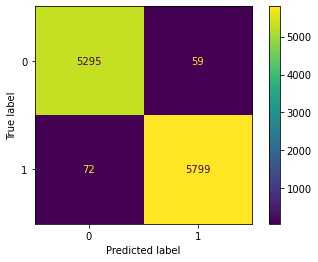

In [61]:
cm = confusion_matrix(y_test, predictions, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot() 

In [62]:
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
print("F1 score: ", f1)
print("Accuracy: ", accuracy)

F1 score:  0.9883302294634126
Accuracy:  0.9883296213808463


In [63]:
RF = RandomForestClassifier(random_state=42)
RF = RF.fit(trainVectorsMeans, y_train)
predictions = RF.predict(testVectorsMeans)

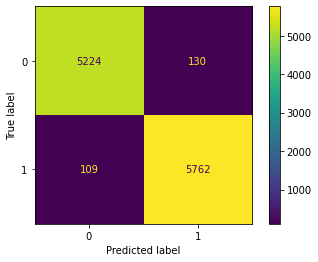

In [64]:
cm = confusion_matrix(y_test, predictions, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot() 

In [65]:
f1 = f1_score(y_test, predictions, average='weighted')
accuracy = accuracy_score(y_test, predictions)
print("F1 score: ", f1)
print("Accuracy: ", accuracy)

F1 score:  0.9787063269871619
Accuracy:  0.9787082405345212
